In [1]:
## NLP_Assign_6_Sentiment_Analysis.ipynb

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
text = open('/content/drive/My Drive/NLP/edu_policy_2020.txt', encoding="utf-8").read()
lower_case = text.lower()
# str.maketrans removes any punctuations 
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
# Using word_tokenize to tokenize sentence into words
tokenized_words = word_tokenize(cleaned_text, "english")

In [5]:
# Removing Stop Words
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [6]:
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [7]:
emotion_list = []
with open('/content/drive/My Drive/NLP/emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in lemma_words:
            emotion_list.append(emotion)

print("People emotions from the text \n", emotion_list, '\n \n')
w = Counter(emotion_list)
print("Count of each emotion \n", w)

People emotions from the text 
 [' fearless', ' adequate', ' happy', ' attached', ' attracted', ' happy'] 
 

Count of each emotion 
 Counter({' happy': 2, ' fearless': 1, ' adequate': 1, ' attached': 1, ' attracted': 1})


In [15]:
sia = SentimentIntensityAnalyzer()
print (sia.polarity_scores(cleaned_text))

{'neg': 0.024, 'neu': 0.786, 'pos': 0.19, 'compound': 0.9989}


In [16]:
def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n     ******Negative Sentiment*******")
        
    elif score['neg'] < score['pos']:
        print("\n     ******Positive Sentiment*******")
    else:
        print("Neutral Sentiment")


     ******Positive Sentiment*******


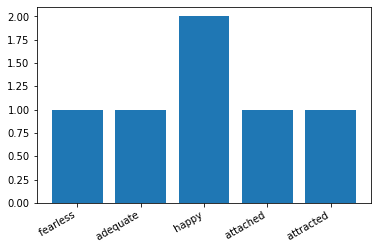

In [17]:
sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()